# Normal mode and harmonic fitting with reductions

We'll use orthogonality between functions to fit (vertical) normal modes and (temporal) harmonics with reduction operations (summing along axis).

Let $b_n(z)$ be vertical normal modes with
$$\int {\rm d}z\, b_n(z) \cdot b_m(z) = \delta_{n,m}$$
and $h_{T,\tau}(t)$ be temporal harmonic modes with period $T$ and phase $\tau$ which fulfil
$$\int {\rm d}t\, h_{T,0}(t) \cdot h_{T/2,0}(t) = 0$$
$$\int {\rm d}t\, h_{T,0}(t) \cdot h_{T,0}(t) = 1$$

Then, we could compose a signal $s(t, z)$ with different normal modes each having a separate annual and semi-annual cycle as:
$$s(t, z)= \sum_n \alpha^a_n \cdot b_n(z) \cdot h_{365d, \tau^a_n}(t) + \sum_n \alpha^s_n \cdot b_n(z) \cdot h_{365d/2.0, \tau^s_n}(t)$$
where $\alpha^a_n$ are the amplitudes of the annual cycle of the vertical mode $n$, $\alpha^s_n$ are the amplitudes of the semi-annual cycle of the vertical mode $n$, $\tau^a_n$ is the phase shift of the annual cycle of vertical mode $n$, and $\tau^s_n$ is the phase shift of the semi-annual cycle of vertical mode $n$.

The time-variability of the vertical mode $n$ can be diagnosed using a time integral:
$$\alpha^a_1 \cdot h_{365d,\tau^a_1}(t) + \alpha^a_1 \cdot h_{365d/2.0,\tau^a_1}(t) = \int {\rm d}z\, b_1(z) \cdot s(t,z) \equiv s_1(t)$$
$$\alpha^a_2 \cdot h_{365d,\tau^a_2}(t) + \alpha^a_2 \cdot h_{365d/2.0,\tau^a_2}(t) = \int {\rm d}z\, b_2(z) \cdot s(t,z) \equiv s_2(t)$$
$$...$$

The phase and amplitude of $s_n(t)$ can be diagnosed by projecting on a normalized annual ${\rm e}^{2i\pi/365d \cdot t}$ or semi-annual ${\rm e}^{4i\pi/365d \cdot t}$:

$$\alpha^a_1 \propto \left|\int {\rm d}t\, {\rm e}^{2i\pi/365d \cdot t} s_1(t)\right|$$

$$\alpha^a_2 \propto \left|\int {\rm d}t\, {\rm e}^{2i\pi/365d \cdot t} s_2(t)\right|$$

$$...$$

$$\alpha^s_1 
\propto \left|\int {\rm d}t\, {\rm e}^{4i\pi/365d \cdot t} s_1(t)\right|$$

$$\alpha^s_2 
\propto \left|\int {\rm d}t\, {\rm e}^{4i\pi/365d \cdot t} s_2(t)\right|$$

$$...$$

and

$$\tau^a_1 = {\rm arg}\left(\int {\rm d}t\, {\rm e}^{2i\pi/365d \cdot t} s_1(t)\right)$$
$$\tau^a_2 = {\rm arg}\left(\int {\rm d}t\, {\rm e}^{2i\pi/365d \cdot t} s_2(t)\right)$$
$$...$$

$$\tau^s_1 = {\rm arg}\left(\int {\rm d}t\, {\rm e}^{4i\pi/365d \cdot t} s_1(t)\right)$$
$$\tau^s_2 = {\rm arg}\left(\int {\rm d}t\, {\rm e}^{4i\pi/365d \cdot t} s_2(t)\right)$$
$$...$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Orthogonal normal modes

In [2]:
def normalize(x=None, y=None):
    return y / np.linalg.norm(y) / (x.max() - x.min()) ** 0.5


def normal_mode(x, mode=1):
    """Create normal sine modes."""
    return normalize(
        x=x,
        y=np.sin(
            mode * np.pi * (x - x.min()) / (x.max() - x.min())
        )
    )

In [3]:
z = np.linspace(0, -1500, 1234)
normal_mode_1 = normal_mode(z, 1)
normal_mode_2 = normal_mode(z, 2)

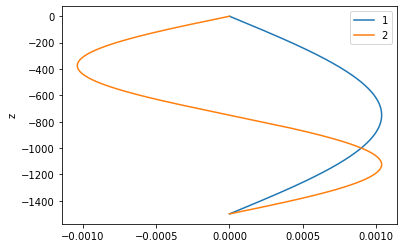

In [4]:
plt.plot(normal_mode_1, z, label="1")
plt.plot(normal_mode_2, z, label="2")
plt.ylabel("z")
plt.legend();

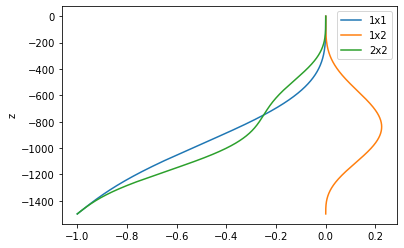

In [5]:
plt.plot((normal_mode_1 * normal_mode_1).cumsum() * z, z, label="1x1")
plt.plot((normal_mode_1 * normal_mode_2).cumsum() * z, z, label="1x2")
plt.plot((normal_mode_2 * normal_mode_2).cumsum() * z, z, label="2x2")
plt.ylabel("z")
plt.legend();

## Normal mode fitting

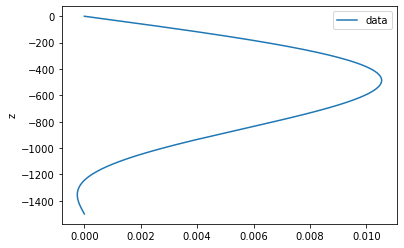

In [6]:
vertical_data = 7.4 * normal_mode_1 - 4.3 * normal_mode_2
plt.plot(vertical_data, z, label="data")
plt.ylabel("z")
plt.legend();

In [7]:
coeff_1 = (normal_mode_1 * vertical_data).sum() * (z.max() - z.min())
coeff_2 = (normal_mode_2 * vertical_data).sum() * (z.max() - z.min())
print(coeff_1, coeff_2)

7.3999999999999995 -4.300000000000001


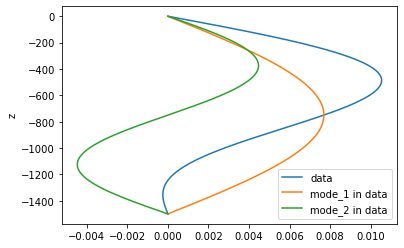

In [8]:
plt.plot(vertical_data, z, label="data")
plt.plot(coeff_1 * normal_mode_1, z, label="mode_1 in data")
plt.plot(coeff_2 * normal_mode_2, z, label="mode_2 in data")
plt.ylabel("z")
plt.legend();

## Orthogonal harmonic variability

In [9]:
def harmonic_cycle(t, T=1, phi=0):
    """Create harmonic cycles."""
    return np.sin(2 * np.pi / T * (t + phi))

In [10]:
t = np.arange(3 * 365)
annual_signal_1 = harmonic_cycle(t, T=365, phi=0)
annual_signal_2 = harmonic_cycle(t, T=365, phi=72)
semi_annual_signal_1 = harmonic_cycle(t, T=365 / 2.0, phi=45)
semi_annual_signal_2 = harmonic_cycle(t, T=365 / 2.0, phi=-14)

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


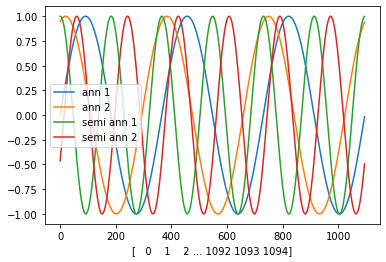

In [11]:
plt.plot(t, annual_signal_1, label="ann 1")
plt.plot(t, annual_signal_2, label="ann 2")
plt.plot(t, semi_annual_signal_1, label="semi ann 1")
plt.plot(t, semi_annual_signal_2, label="semi ann 2")
plt.xlabel(t)
plt.legend();

In [12]:
def harmonic_proj(t=None, T=None, signal=None):
    #     harmonic_mode = (
    #         normalize(t, harmonic_cycle(t, T=T, phi=0))
    #         + 1j * normalize(t, harmonic_cycle(t, T=T, phi=T / 4.0))
    #     ) / (2 ** 0.5)
    harmonic_mode = normalize(
        t,
        harmonic_cycle(t, T=T, phi=0) + 1j * harmonic_cycle(t, T=T, phi=T / 4.0)
    )
    return (signal * harmonic_mode).sum()


def harmonic_phase(t=None, T=None, signal=None):
    proj = harmonic_proj(t=t, T=T, signal=signal)
    return np.arctan2(np.imag(proj), np.real(proj)) * T / np.pi / 2


def harmonic_amplitude(t=None, T=None, signal=None):
    proj = harmonic_proj(t=t, T=T, signal=signal)
    return 2 * np.abs(proj)

In [13]:
temporal_signal_1 = 1.2 * annual_signal_1 + 4.5 * semi_annual_signal_1
temporal_signal_2 = 2.2 * annual_signal_2 + 11.5 * semi_annual_signal_2

/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


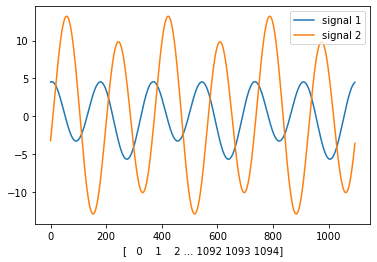

In [14]:
plt.plot(t, temporal_signal_1, label="signal 1")
plt.plot(t, temporal_signal_2, label="signal 2")
plt.xlabel(t)
plt.legend();

In [15]:
ann_phase_1 = harmonic_phase(t, 365, temporal_signal_1)
ann_phase_2 = harmonic_phase(t, 365, temporal_signal_2)
print(ann_phase_1, ann_phase_2)

-4.1633726390504027e-14 72.00000000000001


In [16]:
ann_amplitude_1 = harmonic_amplitude(t, 365, temporal_signal_1)
ann_amplitude_2 = harmonic_amplitude(t, 365, temporal_signal_2)
print(ann_amplitude_1, ann_amplitude_2)

1.2005483207962633 2.2010052547931505


In [17]:
semi_ann_phase_1 = harmonic_phase(t, 365 / 2.0, temporal_signal_1)
semi_ann_phase_2 = harmonic_phase(t, 365 / 2.0, temporal_signal_2)
print(semi_ann_phase_1, semi_ann_phase_2)

45.0 -13.999999999999993


In [18]:
semi_ann_amplitude_1 = harmonic_amplitude(t, 365 / 2.0, temporal_signal_1)
semi_ann_amplitude_2 = harmonic_amplitude(t, 365 / 2.0, temporal_signal_2)
print(semi_ann_amplitude_1, semi_ann_amplitude_2)

4.502056202985988 11.505254740964194
